In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("seoul bike data with dummies.csv")

In [3]:
df

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_May,month_November,month_October,month_September,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
X = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

In [5]:
len(X)

8760

In [6]:
len(y)

8760

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [14]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.svm import LinearSVR
lin_svr = LinearSVR()
lin_svr.fit(X_train, y_train)

LinearSVR()

In [16]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [20]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
def report(model):
    preds = model.predict(X_test)
    print(f"MAE: {mean_absolute_error(y_test,preds)}")
    print(f"MSE: {mean_squared_error(y_test,preds)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test,preds))}")


In [23]:
print("Linear Model")
report(lin)

Linear Model
MAE: 322.4002976712144
MSE: 185209.41476652978
RMSE: 430.3596342206478


In [24]:
print("Log Model")
report(log)

Log Model
MAE: 278.0228310502283
MSE: 187901.4596651446
RMSE: 433.47601971175357


In [25]:
print("Linear SVR")
report(lin_svr)

Linear SVR
MAE: 316.5079692324909
MSE: 216216.1339012154
RMSE: 464.9904664627173


In [26]:
print("SVR")
report(svr)

SVR
MAE: 419.31278715401584
MSE: 361078.68750107946
RMSE: 600.8982338974541


In [27]:
print("DT Model")
report(dt)

DT Model
MAE: 163.20205479452054
MSE: 82889.19292237442
RMSE: 287.90483310006175


In [28]:
print("RF Model")
report(rf)

RF Model
MAE: 119.20119482496195
MSE: 39290.524273211566
RMSE: 198.21837521585016


In [29]:
print("GB Model")
report(gb)

GB Model
MAE: 168.64054103093608
MSE: 63808.91723647091
RMSE: 252.60427002818244


In [30]:
print("AB Model")
report(ab)

AB Model
MAE: 368.1841305672207
MSE: 184275.45449664624
RMSE: 429.2731700172354


In [32]:
test_predictions = lin.predict(X_test)

In [33]:
test_res = y_test - test_predictions

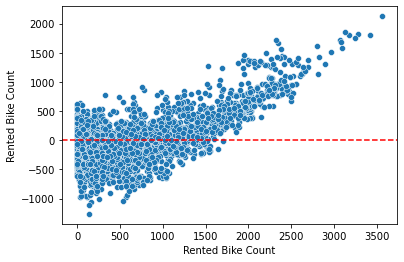

In [34]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [35]:
import scipy as sp

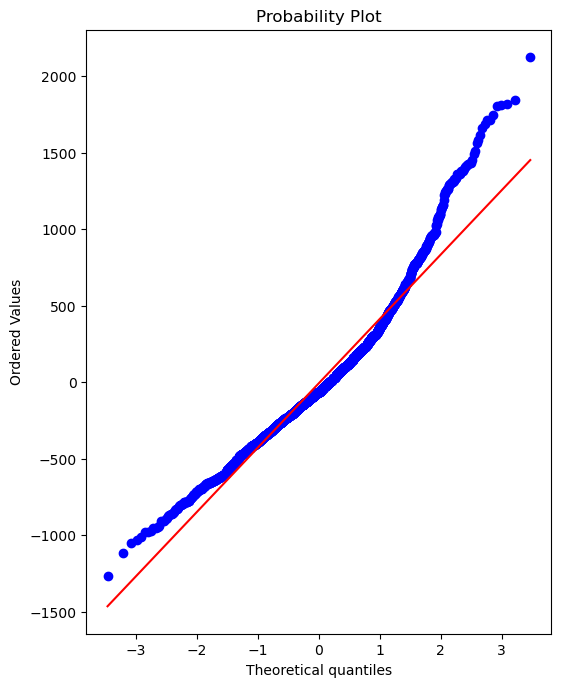

In [36]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

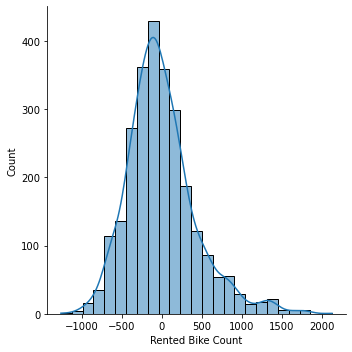

In [37]:
sns.displot(test_res,bins=25,kde=True)